<a href="https://colab.research.google.com/github/tomonari-masada/course2024-sml/blob/main/13_2d_visualization_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
from umap import UMAP

np.random.seed(42)

%config InlineBackend.figure_format = "retina"

In [ ]:
def scatter_plot(embedding, target, cmap=plt.get_cmap("tab20"), ax=None):
  for color in np.unique(target):
    indices = (target == color)
    if ax is None:
      plt.scatter(embedding[indices, 0], embedding[indices, 1], label=color, color=cmap(color), s=3, alpha=0.5)
    else:
      ax.scatter(embedding[indices, 0], embedding[indices, 1], label=color, color=cmap(color), s=3, alpha=0.5)

In [ ]:
digits = datasets.load_digits()

In [ ]:
def generate_noisy_image():
  while True:
    idx1, idx2 = np.random.randint(len(digits.target), size=2)
    # 違う数字の画像であることの確認
    if digits.target[idx1] != digits.target[idx2]:
      break
  noisy_image = np.zeros(64)
  noisy_image[:32] = digits.data[idx1, :32]
  noisy_image[32:] = digits.data[idx2, 32:]
  return noisy_image

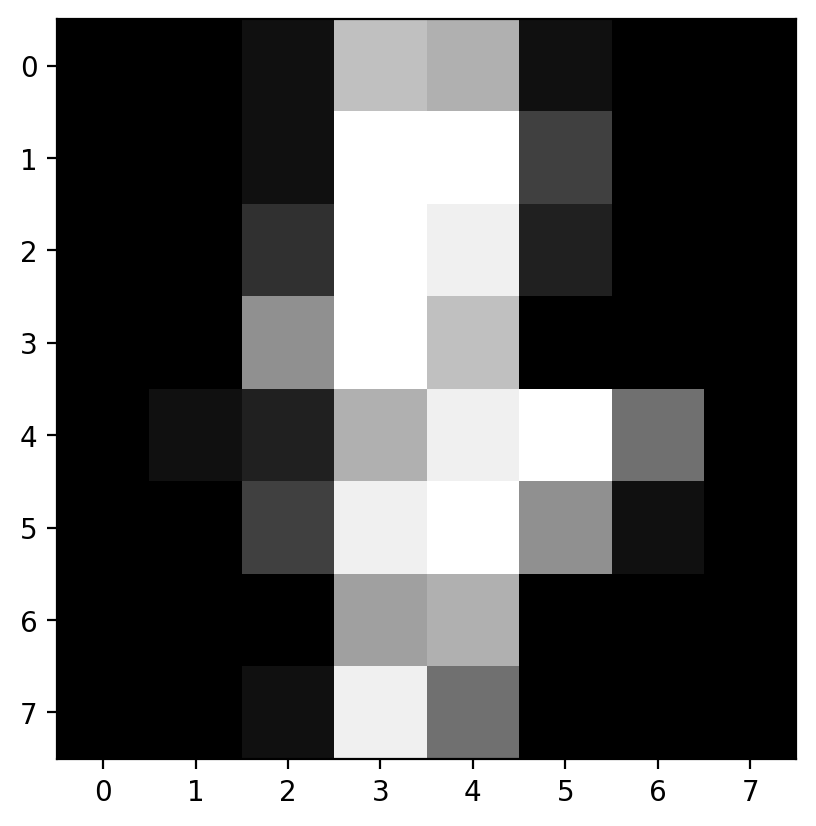

In [ ]:
noisy_image = generate_noisy_image()
plt.imshow(noisy_image.reshape(8, -1), cmap="gray");

In [ ]:
n_noisy_images = (digits.target == 0).sum()
noisy_images = np.zeros((n_noisy_images, 64))
for i in range(n_noisy_images):
  noisy_images[i, :] = generate_noisy_image()

In [ ]:
digits = datasets.load_digits()
digits.data = np.concatenate([digits.data, noisy_images])
digits.target = np.concatenate([digits.target, np.full(n_noisy_images, 10)])

* ノイズ画像の数を3倍にする。

In [ ]:
n_noisy_images = (digits.target == 0).sum() * 3
noisy_images = np.zeros((n_noisy_images, 64))
for i in range(n_noisy_images):
  noisy_images[i, :] = generate_noisy_image()

In [ ]:
digits3 = datasets.load_digits()
digits3.data = np.concatenate([digits.data, noisy_images])
digits3.target = np.concatenate([digits.target, np.full(n_noisy_images, 10)])

* PCAの場合
  * 「０」〜「９」の散らばり方は、ノイズ画像を増やしても、あまり変わらない。

[]

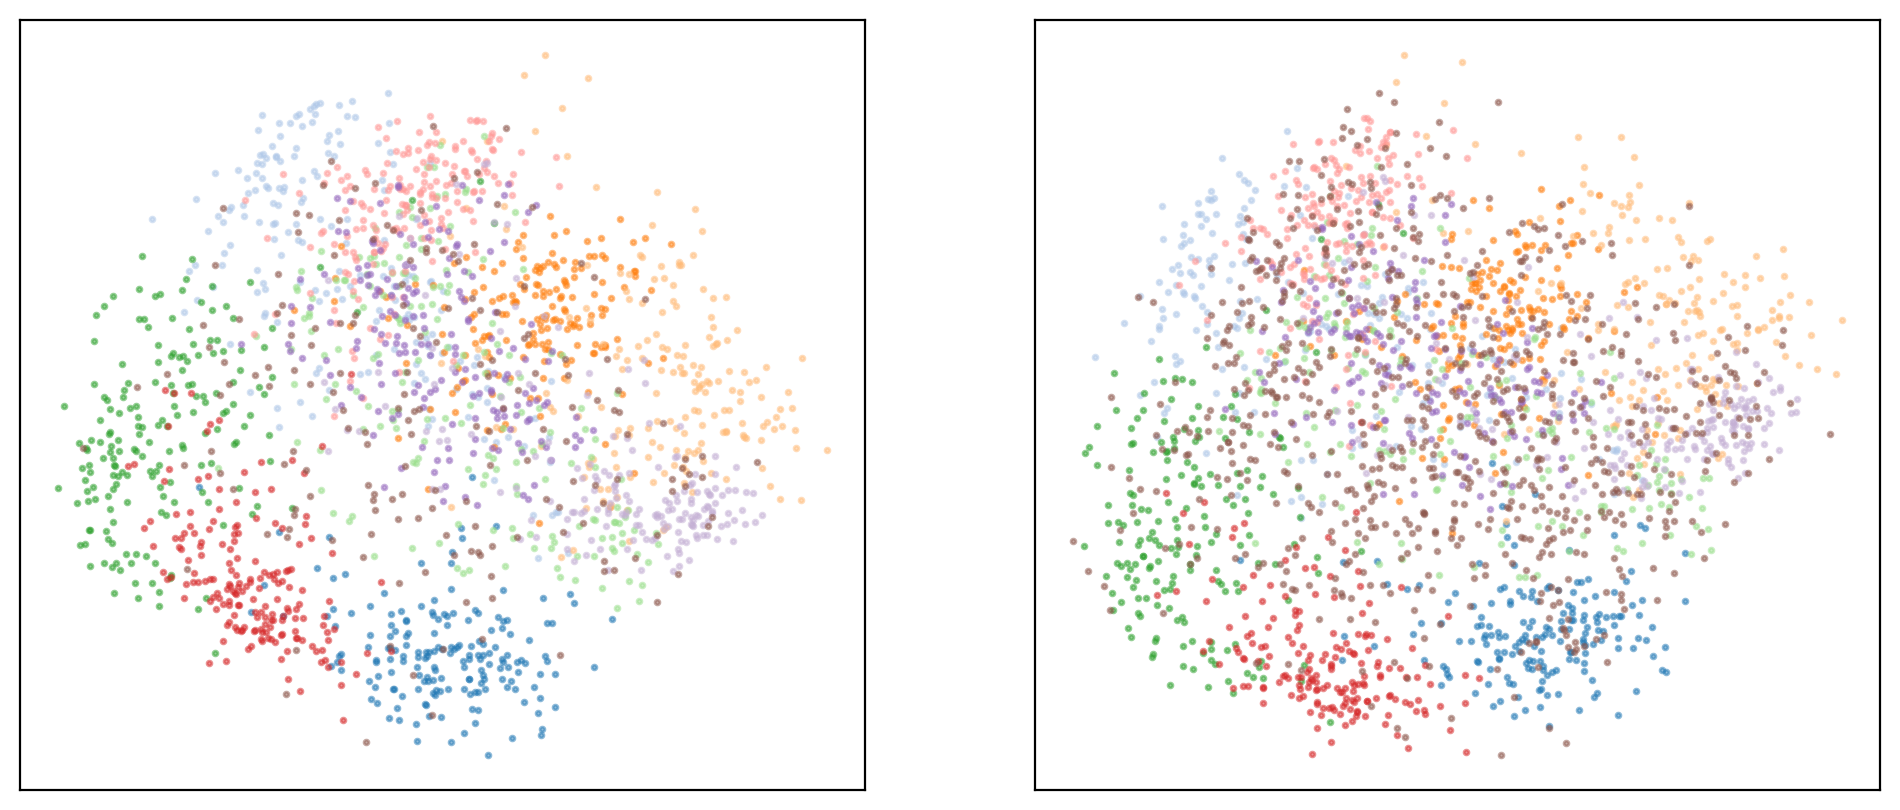

In [ ]:
pca = PCA(2, random_state=42)
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(121)
embedding = pca.fit_transform(digits.data)
scatter_plot(embedding, digits.target, ax=ax)
plt.setp(ax, xticks=[], yticks=[])
ax = fig.add_subplot(122)
embedding = pca.fit_transform(digits3.data)
scatter_plot(embedding, digits3.target, ax=ax)
plt.setp(ax, xticks=[], yticks=[])

* UMAPの場合
  * ノイズ画像を増やすと、「０」〜「９」のクラスタがそれぞれ拡散している。

[]

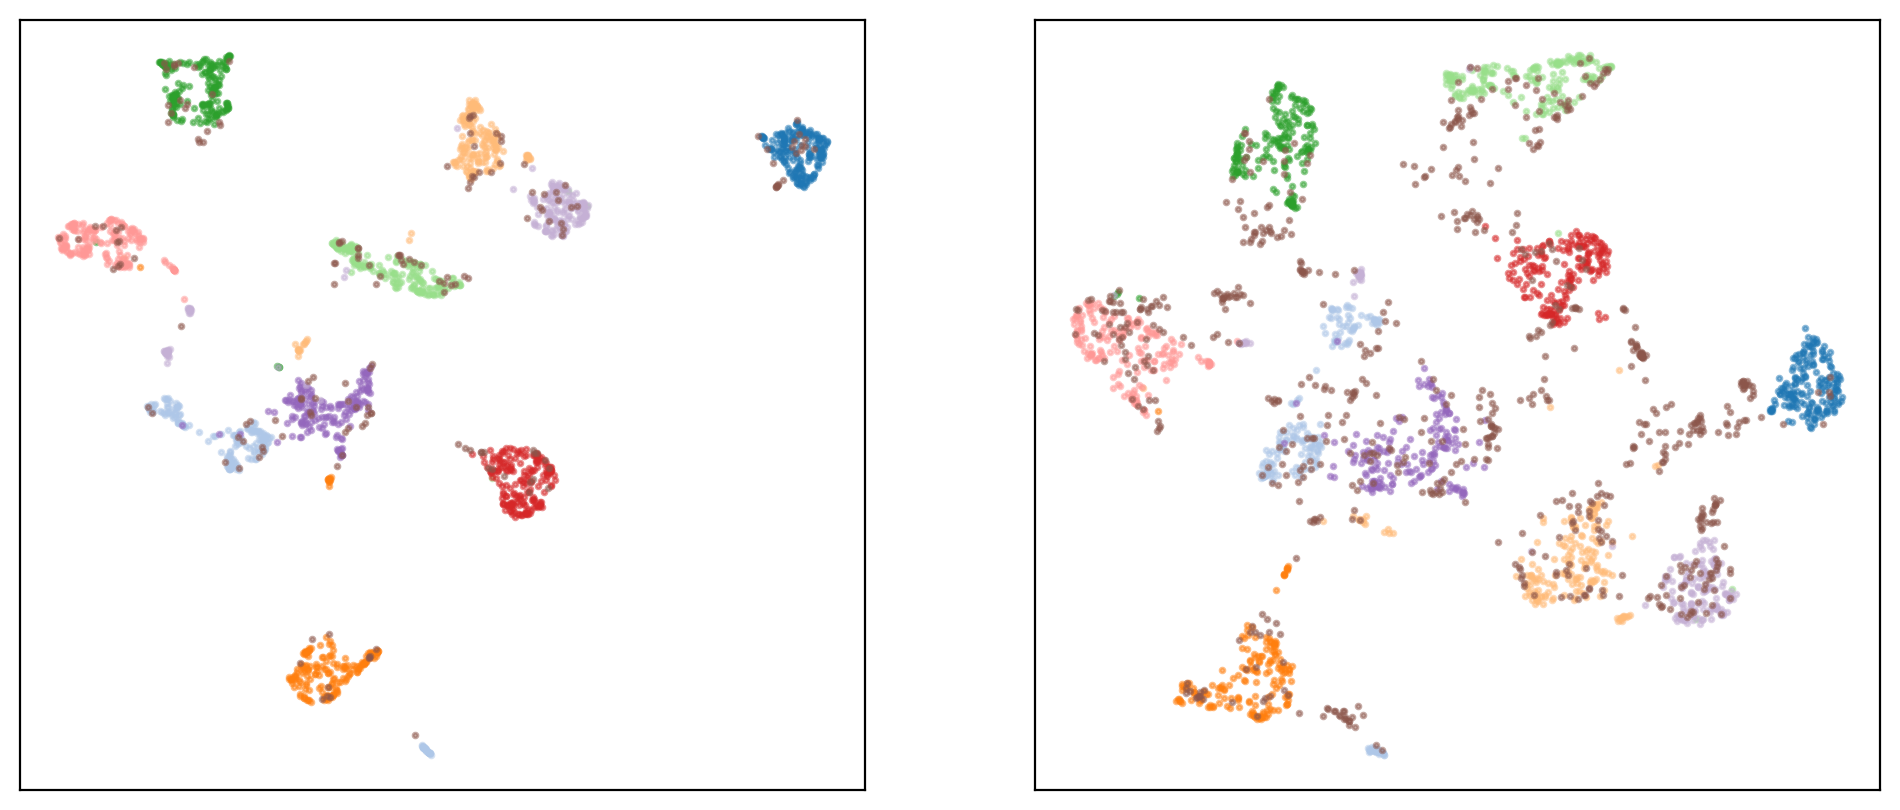

In [ ]:
reducer = UMAP(n_jobs=1, random_state=42)
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(121)
embedding = reducer.fit_transform(digits.data)
scatter_plot(embedding, digits.target, ax=ax)
plt.setp(ax, xticks=[], yticks=[])
ax = fig.add_subplot(122)
embedding = reducer.fit_transform(digits3.data)
scatter_plot(embedding, digits3.target, ax=ax)
plt.setp(ax, xticks=[], yticks=[])

* TSNEの場合
  * ノイズ画像を増やすと、「０」〜「９」のクラスタがお互いにより接近している。

[]

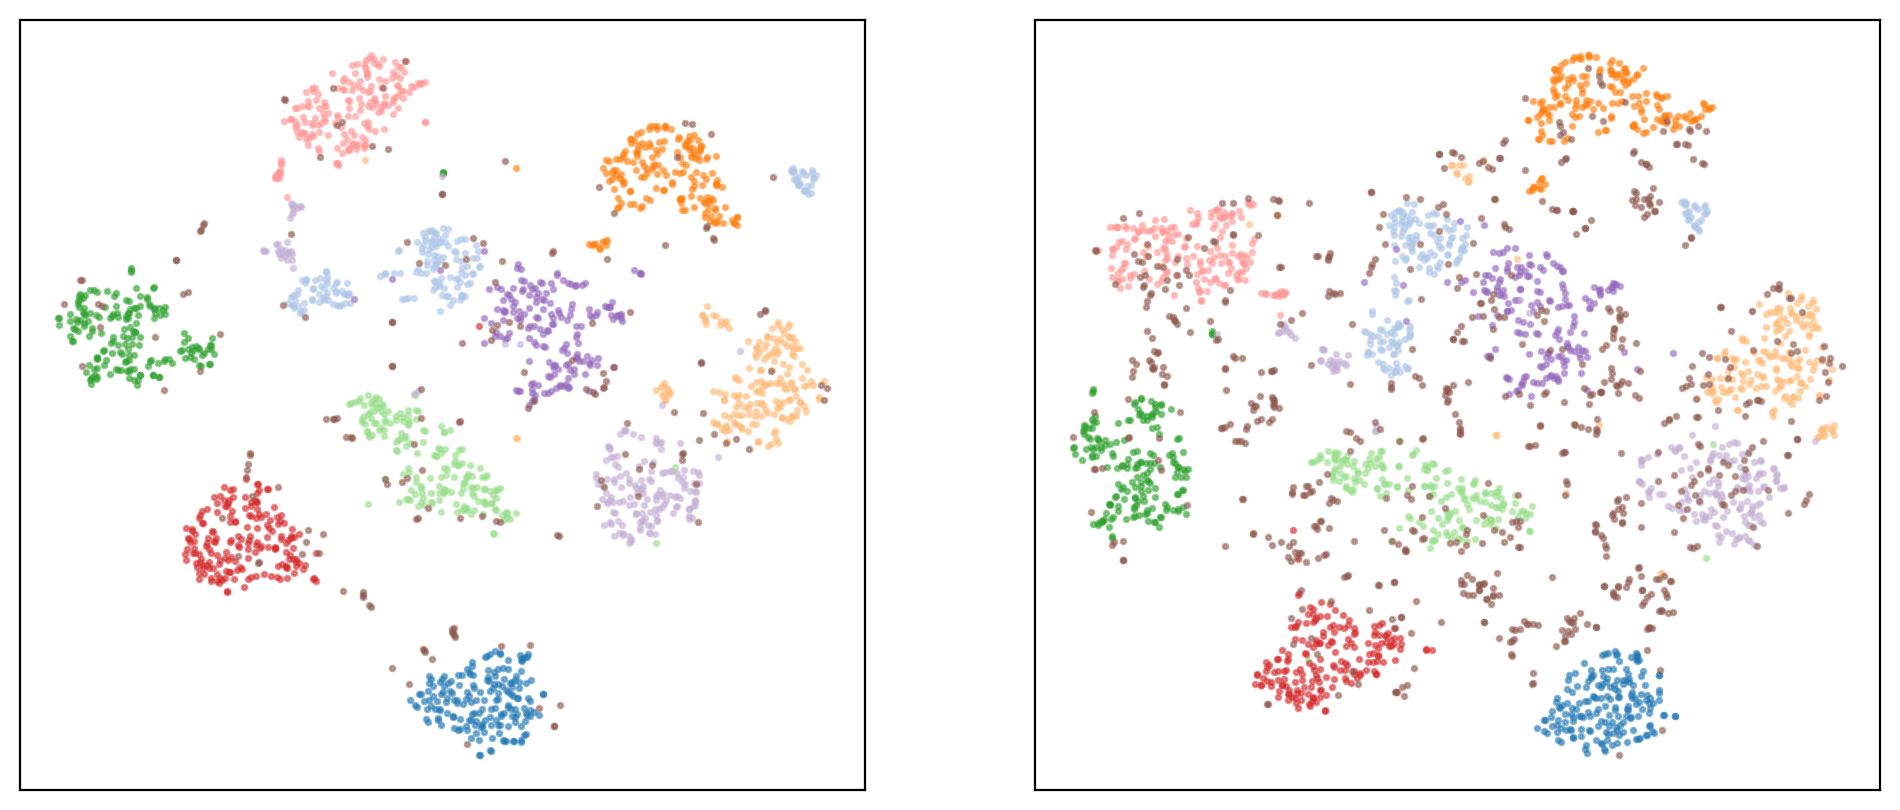

In [ ]:
reducer = TSNE(random_state=42)
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(121)
embedding = reducer.fit_transform(digits.data)
scatter_plot(embedding, digits.target, ax=ax)
plt.setp(ax, xticks=[], yticks=[])
ax = fig.add_subplot(122)
embedding = reducer.fit_transform(digits3.data)
scatter_plot(embedding, digits3.target, ax=ax)
plt.setp(ax, xticks=[], yticks=[])

* MDSの場合
  * ノイズ画像を増やすことで、全体的に点群が凝集しているように見える。

[]

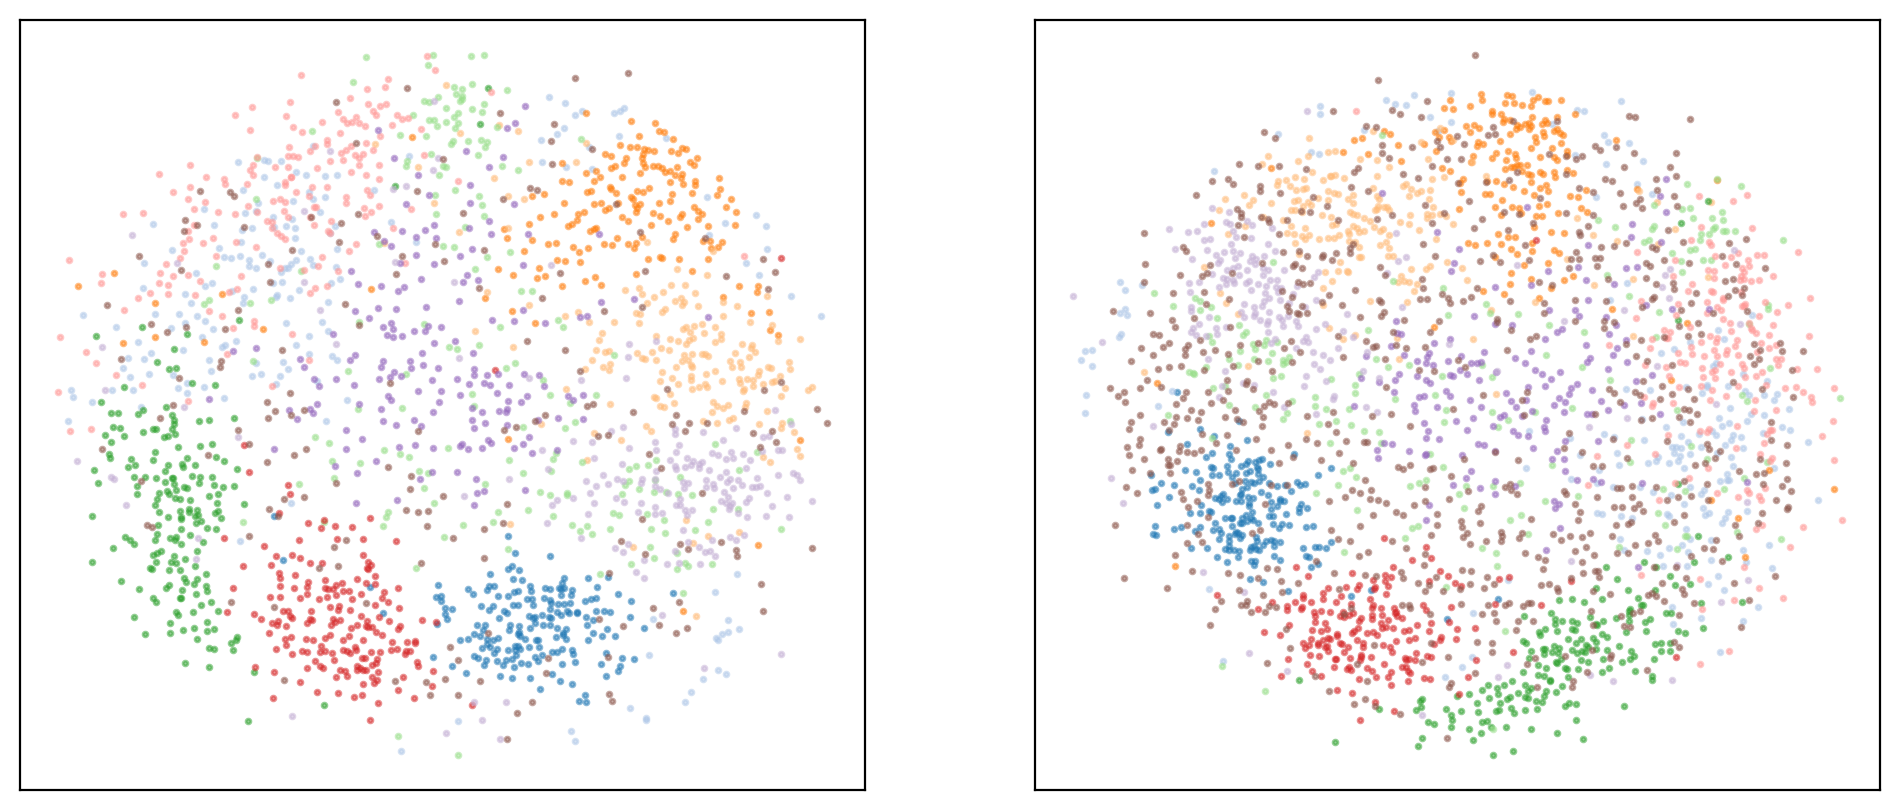

In [ ]:
reducer = MDS(normalized_stress="auto", random_state=42)
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(121)
embedding = reducer.fit_transform(digits.data)
scatter_plot(embedding, digits.target, ax=ax)
plt.setp(ax, xticks=[], yticks=[])
ax = fig.add_subplot(122)
embedding = reducer.fit_transform(digits3.data)
scatter_plot(embedding, digits3.target, ax=ax)
plt.setp(ax, xticks=[], yticks=[])